# CHARTING THE PATH TO SUSTAINABILITY: Integrating Land Sector Data with SDGs 

### TASK 3 - GEOSPATIAL ANALYSIS

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline
import json
from esda.moran import Moran
import libpysal as lps
import splot
from splot.esda import moran_scatterplot

In [2]:
#Read and load data
with open ("C:/Users/adere/Downloads/NGA-20231026T051526Z-001/NGA/NGA_AL2_Nigeria.json") as file:
    nga = json.load(file)

In [3]:
nga_data = gpd.GeoDataFrame.from_features(nga['features'])

In [4]:
with open ("C:/Users/adere/Downloads/KoppenGeigerClimateShifts/2001-2025-A1FI.geojson") as file:
    climate = json.load(file)

In [5]:
Climate = gpd.GeoDataFrame.from_features(climate['features'])

In [6]:
# Clip "nga data" to the extent of the climate data
nga_data_clipped = gpd.overlay(nga_data, Climate, how='intersection')

In [7]:
nga_data_clipped.head(2)

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,OBJECTID,ID,GRIDCODE,Shape_Length,Shape_Area,geometry
0,NGA,,Nigeria,Nigeria,Nigeria,,administrative,2,Q1033,en:Nigeria,2019-09-18 23:02:02,1548,1548,12,4.0,0.75,"POLYGON ((3.99934 6.42563, 3.99710 6.42605, 3...."
1,NGA,,Nigeria,Nigeria,Nigeria,,administrative,2,Q1033,en:Nigeria,2019-09-18 23:02:02,1565,1565,11,5.0,1.00,"MULTIPOLYGON (((7.40626 4.49956, 7.40648 4.498..."


In [8]:
# Create a dictionary to map integers to climate codes
climate_mapping = {
    11: "Af",
    12: "Am",
    13: "As",
    14: "Aw",
    21: "BWk",
    22: "BWh",
    26: "BSk",
    27: "BSh",
    31: "Cfa",
    32: "Cfb",
    33: "Cfc",
    34: "Csa",
    35: "Csb",
    36: "Csc",
    37: "Cwa",
    38: "Cwb",
    39: "Cwc",
    41: "Dfa",
    42: "Dfb",
    43: "Dfc",
    44: "Dfd",
    45: "Dsa",
    46: "Dsb",
    47: "Dsc",
    48: "Dsd",
    49: "Dwa",
    50: "Dwb",
    51: "Dwc",
    52: "Dwd",
    61: "EF",
    62: "ET"
}

# Use the "GRIDCODE" column in your DataFrame to map to climate code
nga_data_clipped['Climate Code'] = nga_data_clipped['GRIDCODE'].map(climate_mapping)

In [9]:
nga_data_clipped.head(2)

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,OBJECTID,ID,GRIDCODE,Shape_Length,Shape_Area,geometry,Climate Code
0,NGA,,Nigeria,Nigeria,Nigeria,,administrative,2,Q1033,en:Nigeria,2019-09-18 23:02:02,1548,1548,12,4.0,0.75,"POLYGON ((3.99934 6.42563, 3.99710 6.42605, 3....",Am
1,NGA,,Nigeria,Nigeria,Nigeria,,administrative,2,Q1033,en:Nigeria,2019-09-18 23:02:02,1565,1565,11,5.0,1.00,"MULTIPOLYGON (((7.40626 4.49956, 7.40648 4.498...",Af


In [10]:
with open ("C:/Users/adere/Downloads/KoppenGeigerClimateShifts/2001-2025-A2.geojson") as file:
    climate1 = json.load(file)

In [11]:
climate_1 =gpd.GeoDataFrame.from_features(climate1['features'])

In [12]:
# Clip "nga data" to the extent of the climate data
nga_data1_clipped = gpd.overlay(nga_data, climate_1, how='intersection')

In [13]:
nga_data1_clipped.head(2)

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,OBJECTID,ID,GRIDCODE,Shape_Length,Shape_Area,geometry
0,NGA,,Nigeria,Nigeria,Nigeria,,administrative,2,Q1033,en:Nigeria,2019-09-18 23:02:02,1555,1555.0,12.0,4.0,0.75,"POLYGON ((3.99934 6.42563, 3.99710 6.42605, 3...."
1,NGA,,Nigeria,Nigeria,Nigeria,,administrative,2,Q1033,en:Nigeria,2019-09-18 23:02:02,1575,1575.0,11.0,5.0,1.00,"MULTIPOLYGON (((7.40626 4.49956, 7.40648 4.498..."


In [14]:
# Create a dictionary to map integers to climate codes
climate_mapping = {
    11: "Af",
    12: "Am",
    13: "As",
    14: "Aw",
    21: "BWk",
    22: "BWh",
    26: "BSk",
    27: "BSh",
    31: "Cfa",
    32: "Cfb",
    33: "Cfc",
    34: "Csa",
    35: "Csb",
    36: "Csc",
    37: "Cwa",
    38: "Cwb",
    39: "Cwc",
    41: "Dfa",
    42: "Dfb",
    43: "Dfc",
    44: "Dfd",
    45: "Dsa",
    46: "Dsb",
    47: "Dsc",
    48: "Dsd",
    49: "Dwa",
    50: "Dwb",
    51: "Dwc",
    52: "Dwd",
    61: "EF",
    62: "ET"
}

# Use the "GRIDCODE" column in your DataFrame to map to climate code
nga_data1_clipped['Climate Code'] = nga_data1_clipped['GRIDCODE'].map(climate_mapping)

<function matplotlib.pyplot.show(close=None, block=None)>

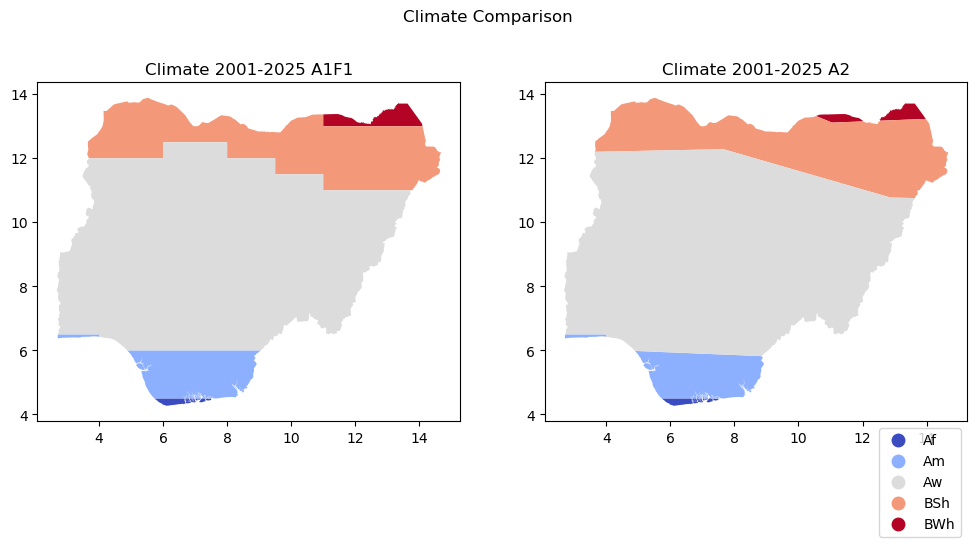

In [15]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first GeoDataFrame based on the 'Climate Code'
nga_data_clipped.plot(column='Climate Code', cmap='coolwarm', ax=axes[0])
axes[0].set_title('Climate 2001-2025 A1F1')

# Plot the second GeoDataFrame based on the 'Climate Code'
nga_data1_clipped.plot(column='Climate Code', cmap='coolwarm', legend=True, ax=axes[1])
axes[1].set_title('Climate 2001-2025 A2')

# Create a legend for the second subplot (axes[1]) and place it in the lower right corner
legend = axes[1].get_legend()
legend.set_bbox_to_anchor((1, 0))

# Add a title for the entire figure
fig.suptitle('Climate Comparison')

# Show the plots
plt.show

### Observation:

### Left Subplot ('Climate 2001-2025 A1F1'):
Observation in the climate distribution for the years 2001-2025.

**Af** - Equatorial Fully Humid: This climate type primarily remains in the southern coastal regions of Nigeria. It is characterized by consistently high temperatures and abundant rainfall throughout the year.

**Am** - Equatorial Monsoonal: 'Am' climate regions also persist in the southern parts of Nigeria, where they experience high temperatures with distinct wet and dry seasons.

**Aw** - Equatorial Winter Dry: 'Aw' climate regions can be seen in the central parts of Nigeria, representing areas with a brief dry season during the winter months.

**Bsh** - Steppe Climate - Hot Arid: The 'Bsh' climate regions appear in the northern part of Nigeria, where hot and arid conditions with limited rainfall prevail.

**BWh** - Desert Climate - Hot Arid: The 'BWh' climate regions are visible in the far north, particularly around the Sahara Desert, where extremely hot and arid conditions with minimal rainfall dominate.

### Right Subplot ('Climate 2001-2025 A2'):
Observation in the climate distribution for the years 2001-2025.

**Af** - Equatorial Fully Humid: 'Af' climate regions have shifted slightly. These changes may indicate an influence on the Equatorial Fully Humid climate, potentially affecting areas with year-round rainfall.

**Am** - Equatorial Monsoonal: 'Am' regions have not experienced significant shifts or variations, thereby not affecting the wet and dry seasons in the southern and central parts of Nigeria.

**Aw** - Equatorial Winter Dry: 'Aw' regions have undergone changes, which may impact areas with a brief dry season during the winter.

**Bsh** - Steppe Climate - Hot Arid: The 'Bsh' climate regions have experienced changes, which affect hot and arid conditions in the northern regions.

**BW** - Desert Climate - Hot Arid: 'BW' regions show slight changes, potentially impacting the extremely hot and arid conditions in the far north.

### Comparison and Implications:

Changes in climate boundaries or the expansion of certain climate types can lead to alterations in local weather conditions. These shifts in climate types can have significant implications for agriculture, water resource management, and urban planning in the affected regions.

Changes in climate patterns, as described in the observations, can have significant impacts on various economic activities in Nigeria. Here's how these changes can affect economic activities:

**Agriculture**:

Climate Impact: Changes in climate types, such as shifts in the distribution of 'Af,' 'Am,' and 'Aw' regions, can influence the timing and amount of rainfall. This can impact crop growth, suitability, and yields.

Economic Impact: Agriculture is a major economic sector in Nigeria. Variations in climate can lead to altered planting seasons, reduced crop yields, and changes in crop choices. This can affect food production, income for farmers, and food security.

**Water Resource Management**:

Climate Impact: Climate changes can lead to shifts in water availability, with potential effects on water resources.

Economic Impact: Water is essential for various economic activities, including agriculture, industry, and domestic use. Changes in water availability can impact water management practices, potentially leading to increased competition for limited water resources, which can increase costs for industries.

**Urban Planning**:

Climate Impact: Changes in climate types can influence temperature and rainfall patterns. For example, urban areas with altered climate conditions may experience more frequent extreme weather events.

Economic Impact: Urban areas are hubs for economic activities and infrastructure development. To adapt to changing climate conditions, cities may need to invest in resilient infrastructure, cooling systems, and public services to ensure residents' well-being. These investments can place a financial burden on local governments and businesses.

In [16]:
with open ("C:/Users/adere/Downloads/KoppenGeigerClimateShifts/2001-2025-B1.geojson") as file:
    climate2 = json.load(file)

In [17]:
climate_2 =gpd.GeoDataFrame.from_features(climate2['features'])

In [18]:
# Clip "nga data" to the extent of the climate data
Nga_clipped_data2 = gpd.overlay(nga_data, climate_2, how='intersection')

In [19]:
# Create a dictionary to map integers to climate codes
climate_mapping = {
    11: "Af",
    12: "Am",
    13: "As",
    14: "Aw",
    21: "BWk",
    22: "BWh",
    26: "BSk",
    27: "BSh",
    31: "Cfa",
    32: "Cfb",
    33: "Cfc",
    34: "Csa",
    35: "Csb",
    36: "Csc",
    37: "Cwa",
    38: "Cwb",
    39: "Cwc",
    41: "Dfa",
    42: "Dfb",
    43: "Dfc",
    44: "Dfd",
    45: "Dsa",
    46: "Dsb",
    47: "Dsc",
    48: "Dsd",
    49: "Dwa",
    50: "Dwb",
    51: "Dwc",
    52: "Dwd",
    61: "EF",
    62: "ET"
}

# Use the "GRIDCODE" column in your DataFrame to map to climate code
Nga_clipped_data2['Climate Code'] = Nga_clipped_data2['GRIDCODE'].map(climate_mapping)

In [20]:
Nga_clipped_data2.head(2)

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,OBJECTID,ID,GRIDCODE,Shape_Length,Shape_Area,geometry,Climate Code
0,NGA,,Nigeria,Nigeria,Nigeria,,administrative,2,Q1033,en:Nigeria,2019-09-18 23:02:02,1555,1555.0,12.0,4.0,0.75,"POLYGON ((3.99934 6.42563, 3.99710 6.42605, 3....",Am
1,NGA,,Nigeria,Nigeria,Nigeria,,administrative,2,Q1033,en:Nigeria,2019-09-18 23:02:02,1572,1572.0,11.0,5.0,1.00,"MULTIPOLYGON (((7.40626 4.49956, 7.40648 4.498...",Af


In [21]:
with open ("C:/Users/adere/Downloads/KoppenGeigerClimateShifts/2001-2025-B2.geojson") as file:
    climate3 =json.load(file)   

In [22]:
climate_3 = gpd.GeoDataFrame.from_features(climate3['features'])

In [23]:
# Clip "nga data" to the extent of the climate data
Nga_clipped_data3 = gpd.overlay(nga_data, climate_3, how='intersection')

In [24]:
# Create a dictionary to map integers to climate codes
climate_mapping = {
    11: "Af",
    12: "Am",
    13: "As",
    14: "Aw",
    21: "BWk",
    22: "BWh",
    26: "BSk",
    27: "BSh",
    31: "Cfa",
    32: "Cfb",
    33: "Cfc",
    34: "Csa",
    35: "Csb",
    36: "Csc",
    37: "Cwa",
    38: "Cwb",
    39: "Cwc",
    41: "Dfa",
    42: "Dfb",
    43: "Dfc",
    44: "Dfd",
    45: "Dsa",
    46: "Dsb",
    47: "Dsc",
    48: "Dsd",
    49: "Dwa",
    50: "Dwb",
    51: "Dwc",
    52: "Dwd",
    61: "EF",
    62: "ET"
}

# Use the "GRIDCODE" column in your DataFrame to map to climate code
Nga_clipped_data3['Climate Code'] = Nga_clipped_data3['GRIDCODE'].map(climate_mapping)

In [25]:
Nga_clipped_data3.head(2)

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,OBJECTID,ID,GRIDCODE,Shape_Length,Shape_Area,geometry,Climate Code
0,NGA,,Nigeria,Nigeria,Nigeria,,administrative,2,Q1033,en:Nigeria,2019-09-18 23:02:02,1579,1579,12,4.0,0.75,"POLYGON ((3.99934 6.42563, 3.99710 6.42605, 3....",Am
1,NGA,,Nigeria,Nigeria,Nigeria,,administrative,2,Q1033,en:Nigeria,2019-09-18 23:02:02,1596,1596,11,5.0,1.00,"MULTIPOLYGON (((7.40626 4.49956, 7.40648 4.498...",Af


<function matplotlib.pyplot.show(close=None, block=None)>

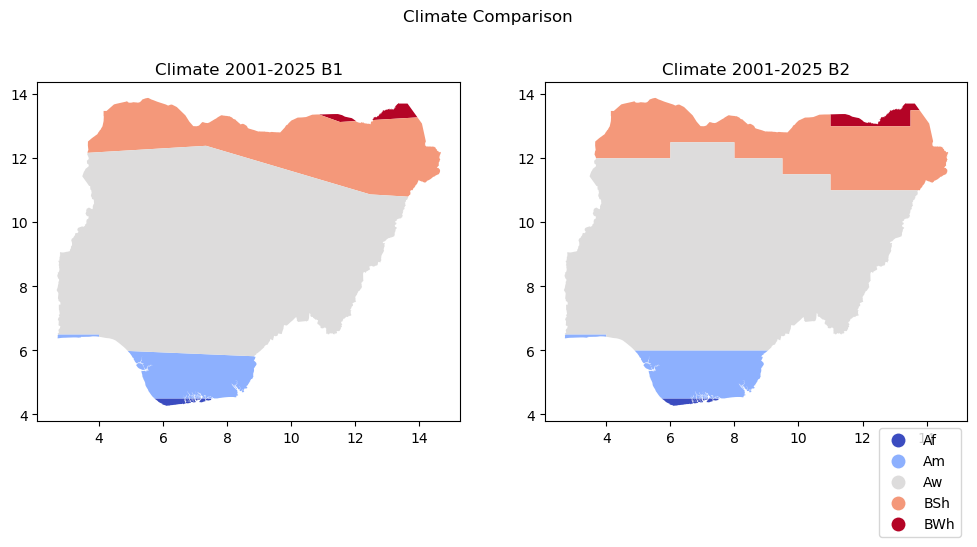

In [26]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first GeoDataFrame based on the 'Climate Code'
Nga_clipped_data2.plot(column='Climate Code', cmap='coolwarm', ax=axes[0])
axes[0].set_title('Climate 2001-2025 B1')

# Plot the second GeoDataFrame based on the 'Climate Code'
Nga_clipped_data3.plot(column='Climate Code', cmap='coolwarm', legend=True, ax=axes[1])
axes[1].set_title('Climate 2001-2025 B2')

# Create a legend for the second subplot (axes[1]) and place it in the lower right corner
legend = axes[1].get_legend()
legend.set_bbox_to_anchor((1, 0))

# Add a title for the entire figure
fig.suptitle('Climate Comparison')

# Show the plots
plt.show

### Observation:

### Left Subplot ('Climate 2001-2025 B1'):

Observations regarding the climate distribution for the years 2001-2025 in the left subplot are as follows:

**Bsh** - Steppe Climate - Hot Arid: In the northern part of Nigeria, it notes the prevalence of hot and arid conditions. Steppe climates are characterized by persistently high temperatures and limited rainfall.

**BWh** - Desert Climate - Hot Arid: This climate type is present in the far northern regions, particularly around the Sahara Desert. It signifies extremely hot and arid conditions with minimal rainfall.

### Right Subplot ('Climate 2001-2025 B2'):

Observations in the right subplot, which also covers the climate distribution for the years 2001-2025, are as follows:

**Bsh** - Steppe Climate - Hot Arid: These regions have experienced changes, potentially affecting the prevalence of hot and arid conditions in the northern areas.

**BW** - Desert Climate - Hot Arid: These regions have also undergone changes, influencing the presence of extremely hot and arid conditions in the far north.

### Comparison and Implications:

Comparing the two subplots, there is a shifts in climate boundaries or alterations in the distribution of specific climate types. These changes may suggest variations in local weather conditions.

The implications of such alterations in climate types are significant. They can impact various aspects which includes:

**Agriculture**:

Climate Impact: Changes in climate distribution, such as a shift towards hot and arid conditions (Bsh and BW climate types), can affect crop suitability and planting seasons. Increased aridity and prolonged droughts can reduce agricultural productivity.

Economic Impact: Agriculture is a major economic activity in Nigeria. Changes in climate can lead to decreased crop yields, impacting food production and food security. Farmers may face challenges in choosing suitable crops and may need to adopt more resilient agricultural practices, which can be costly.

**Water Resource Management**:

Climate Impact: Altered climate patterns can impact water availability, leading to changes in water resources. Hot and arid conditions (Bsh and BW) can result in reduced water availability in rivers and aquifers.

Economic Impact: Water is essential for various economic activities, including agriculture, industry, and domestic use. Reduced water availability can lead to increased competition for water resources and increased costs for water-intensive industries. Water scarcity can also affect hydropower generation and necessitate investments in alternative water sources and infrastructure.

**Urban Planning**:

Climate Impact: Understanding climate changes is essential for urban planning, particularly in areas vulnerable to extreme weather events. Climate changes can lead to increased temperatures and more frequent heatwaves.

Economic Impact: Urban areas are hubs for economic activities and infrastructure development. To adapt to climate changes, cities may need to invest in heat-resistant infrastructure, cooling systems, and public services to ensure residents' well-being. These investments can place a financial burden on local governments and businesses.

The presence of 'Bsh' and 'BW' climate codes in both scenarios indicates the persistence of hot and arid conditions. Changes in the distribution of these climate types may have significant implications for water resources, extreme temperature, and arid land ecosystems in Nigeria.

In [27]:
# Calculate summary statistics for 'Shape_Length' and 'Shape_Area'
summary_stats = nga_data_clipped[['Shape_Length', 'Shape_Area']].describe()
print(summary_stats)

       Shape_Length   Shape_Area
count      6.000000     6.000000
mean     221.333333   396.625000
std      213.926779   565.804753
min        4.000000     0.750000
25%       33.750000    16.250000
50%      191.000000   134.250000
75%      403.000000   565.562500
max      487.000000  1424.250000


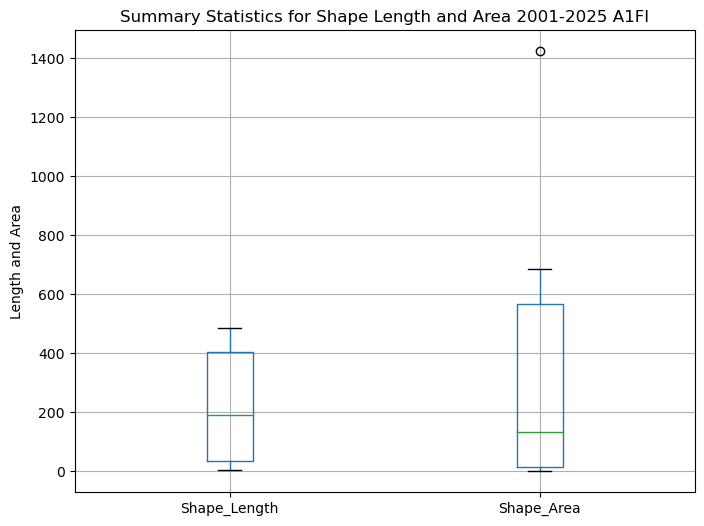

In [28]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create box plots for 'Shape_Length' and 'Shape_Area'
nga_data_clipped[['Shape_Length', 'Shape_Area']].boxplot(ax=ax)

# Set the y-axis label
ax.set_ylabel('Length and Area')

# Set the title
ax.set_title('Summary Statistics for Shape Length and Area 2001-2025 A1FI')

# Show the plot
plt.show()

###  Summary of findings:

**Shape_Length Box Plot**:

Median: The median 'Shape_Length' is around the center of the interquartile range (IQR), indicating that roughly half of the geographic features have a 'Shape_Length' shorter than this value.
Spread: The IQR is relatively narrow, suggesting that the 'Shape_Length' values are concentrated within a limited range. Most of the features have similar lengths.
Outliers: There are a few outliers with 'Shape_Length' values significantly longer than the majority of the features. These outliers might represent exceptional or unique geographic elements.

**Shape_Area Box Plot**:

Median: The median 'Shape_Area' is positioned near the center of the IQR, indicating that roughly half of the features have 'Shape_Area' values smaller than this value.
Spread: The IQR is wider compared to 'Shape_Length,' suggesting that 'Shape_Area' values are more variable. There is a broader range of feature sizes.
Outliers: A few outliers are present with 'Shape_Area' values significantly larger than the majority of the features. These outliers may represent unusually large geographic areas.

### Comparison:
'Shape_Length' tends to be more consistent in length, with a narrow IQR, while 'Shape_Area' varies more in size, with a wider IQR. This indicates that geographic features in the dataset differ more in terms of their areas than their lengths.

In [29]:
# Calculate summary statistics for 'Shape_Length' and 'Shape_Area'
summary_stats_1 = nga_data1_clipped[['Shape_Length', 'Shape_Area']].describe()
print(summary_stats_1)

       Shape_Length   Shape_Area
count      6.000000     6.000000
mean     164.284040   379.425608
std      157.319810   557.791131
min        4.000000     0.750000
25%       27.882580    15.991060
50%      155.675014   135.040188
75%      253.383270   484.735165
max      399.116421  1428.115098


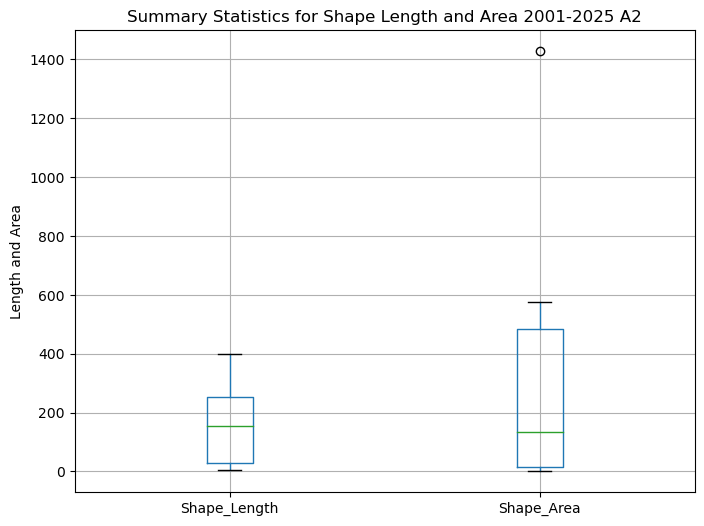

In [30]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create box plots for 'Shape_Length' and 'Shape_Area'
nga_data1_clipped[['Shape_Length', 'Shape_Area']].boxplot(ax=ax)

# Set the y-axis label
ax.set_ylabel('Length and Area')

# Set the title
ax.set_title('Summary Statistics for Shape Length and Area 2001-2025 A2')

# Show the plot
plt.show()

### Summary of Observation

**Shape_Length Boxplot**:

In the boxplot for 'Shape_Length,' the median is represented by the central line inside the box. This indicates that roughly half of the geographic features have 'Shape_Length' values clustered around this central length. The interquartile range (IQR) for 'Shape_Length' is relatively narrow, suggesting that most features have similar lengths, and their lengths are concentrated within a limited range. However, outliers are observed in 'Shape_Length,' which are data points with exceptionally long lengths compared to the majority of the features. These outliers may represent unique or exceptional geographic elements.

**Shape_Area**:

In the boxplot for 'Shape_Area,' the median is also indicated by the central line inside the box, suggesting that approximately half of the features have 'Shape_Area' values clustered around this central area. However, the IQR for 'Shape_Area' is wider compared to 'Shape_Length,' indicating that the areas of geographic features vary more, with a broader range of feature sizes. Similar to 'Shape_Length,' outliers are present in 'Shape_Area,' indicating some features with exceptionally large areas compared to the majority.

### Comparison:

When comparing the two boxplots:

'Shape_Length' appears to have a more concentrated distribution, with most features having similar lengths, as indicated by the narrow IQR. This suggests that the lengths of the geographic features are relatively consistent.

In contrast, 'Shape_Area' has a wider IQR, indicating greater variability in the sizes of geographic features. This means that the areas of features vary more widely compared to their lengths.

Both 'Shape_Length' and 'Shape_Area' exhibit outliers, but the nature of these outliers differs. 'Shape_Length' outliers represent features with exceptionally long lengths, while 'Shape_Area' outliers represent features with exceptionally large areas.

The symmetric extension of whiskers in both box plots suggests that the data distribution in both cases is balanced and does not exhibit pronounced skewness, indicating a relatively even spread of values.

In summary, while both 'Shape_Length' and 'Shape_Area' have outliers, 'Shape_Length' shows more consistent lengths among geographic features, whereas 'Shape_Area' displays a wider range of feature sizes. Both distributions are balanced and not heavily skewed.

In [31]:
# Calculate summary statistics for 'Shape_Length' and 'Shape_Area'
summary_stats_2 = Nga_clipped_data2[['Shape_Length', 'Shape_Area']].describe()
print(summary_stats_2)

       Shape_Length   Shape_Area
count      6.000000     6.000000
mean     180.791666   397.805889
std      174.316439   565.596143
min        4.000000     0.750000
25%       27.905623    16.261654
50%      155.728370   136.382803
75%      329.167563   569.338732
max      397.014591  1423.441080


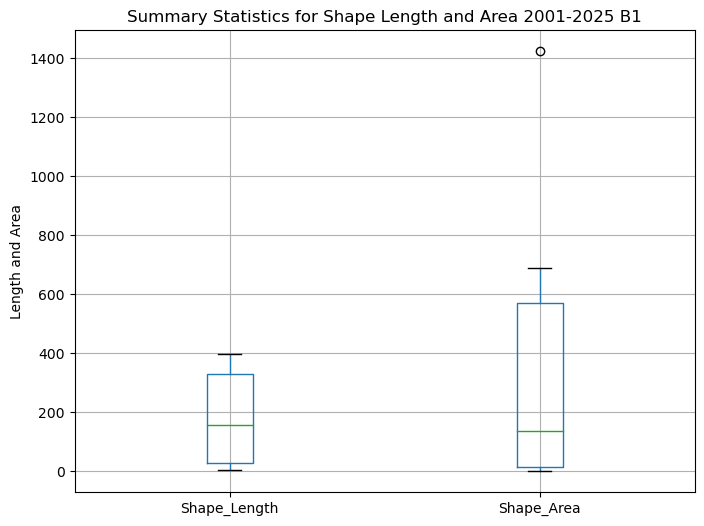

In [32]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create box plots for 'Shape_Length' and 'Shape_Area'
Nga_clipped_data2[['Shape_Length', 'Shape_Area']].boxplot(ax=ax)

# Set the y-axis label
ax.set_ylabel('Length and Area')

# Set the title
ax.set_title('Summary Statistics for Shape Length and Area 2001-2025 B1')

# Show the plot
plt.show()


### Summary of Observations:

**Shape_Length Boxplot**:

Within the 'Shape_Length' box plot, the central line inside the box serves as the median, indicating that approximately half of the geographic features have 'Shape_Length' values clustered around this central length. The interquartile range (IQR) for 'Shape_Length' is relatively narrow, implying that most features have similar lengths, and these lengths are concentrated within a limited range. However, there are outliers in 'Shape_Length,' representing data points with exceptionally long lengths compared to the majority of the features. These outliers may signify unique or exceptional geographic elements.

**Shape_Area Boxplot**:

In the box plot for 'Shape_Area,' the central line within the box also represents the median, suggesting that roughly half of the features have 'Shape_Area' values concentrated around this central area. However, the IQR for 'Shape_Area' is wider in comparison to 'Shape_Length,' indicating that the sizes of geographic features exhibit greater variability, encompassing a broader range of feature sizes. Similar to 'Shape_Length,' outliers are present in 'Shape_Area,' indicating the presence of some features with exceptionally large areas compared to the majority.

### Comparison:

Comparing both box plots:

'Shape_Length' depicts a more concentrated distribution with most features having similar lengths, as indicated by the narrow IQR. This suggests a relatively uniform distribution of lengths among geographic features.

In contrast, 'Shape_Area' displays a wider IQR, indicating more extensive variability in the sizes of geographic features, encompassing a broader spectrum of feature sizes compared to 'Shape_Length.'

Both 'Shape_Length' and 'Shape_Area' exhibit outliers, but the nature of these outliers varies. 'Shape_Length' outliers represent exceptionally long lengths, while 'Shape_Area' outliers represent features with exceptionally large areas.

The symmetric extension of whiskers in both box plots indicates a balanced data distribution in both cases, with no pronounced skewness. This suggests that the data distribution is relatively even and not skewed toward one end.

In summary, while both 'Shape_Length' and 'Shape_Area' feature outliers, 'Shape_Length' showcases more consistent lengths among geographic features, while 'Shape_Area' reflects a wider range of feature sizes. Both distributions appear balanced, without significant skewness.

In [33]:
# Calculate summary statistics for 'Shape_Length' and 'Shape_Area'
summary_stats_3 = Nga_clipped_data3[['Shape_Length', 'Shape_Area']].describe()
print(summary_stats_3)

       Shape_Length   Shape_Area
count      6.000000     6.000000
mean     193.666667   374.833333
std      196.430819   556.228475
min        4.000000     0.750000
25%       23.250000    12.500000
50%      171.000000   127.375000
75%      309.000000   481.125000
max      487.000000  1420.250000


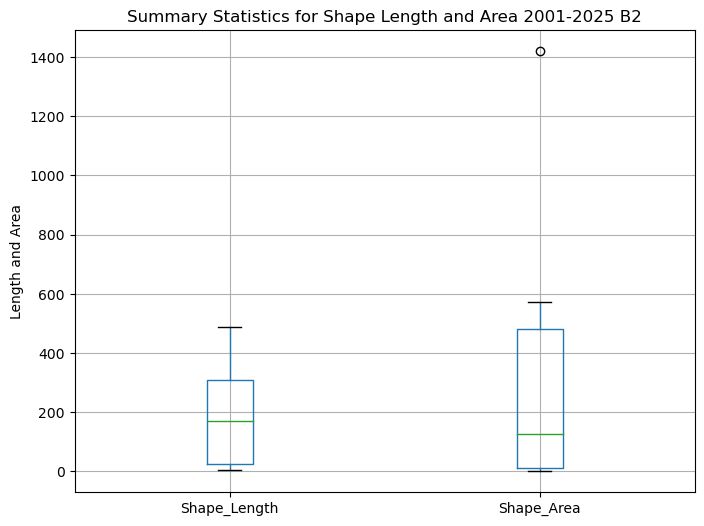

In [34]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create box plots for 'Shape_Length' and 'Shape_Area'
Nga_clipped_data3[['Shape_Length', 'Shape_Area']].boxplot(ax=ax)

# Set the y-axis label
ax.set_ylabel('Length and Area')

# Set the title
ax.set_title('Summary Statistics for Shape Length and Area 2001-2025 B2')

# Show the plot
plt.show()

### Summary of Observations:

**Shape_Length Boxplot**:

Within the 'Shape_Length' box plot, the central line within the box represents the median, signifying that approximately half of the geographic features exhibit 'Shape_Length' values clustered around this central length. The interquartile range (IQR) for 'Shape_Length' is relatively narrow, implying that most features have similar lengths, and these lengths are concentrated within a limited range. However, there are outliers in 'Shape_Length,' which are data points with exceptionally long lengths compared to the majority of the features. These outliers may represent unique or exceptional geographic elements.

**Shape_Area Boxplot**:

In the box plot for 'Shape_Area,' the central line within the box also represents the median, suggesting that about half of the features have 'Shape_Area' values concentrated around this central area. However, the IQR for 'Shape_Area' is wider in comparison to 'Shape_Length,' indicating that the sizes of geographic features vary more extensively, encompassing a broader range of feature sizes. Similarly to 'Shape_Length,' outliers are present in 'Shape_Area,' indicating the existence of some features with exceptionally large areas compared to the majority.

### Comparison:

comparing the two box plots:

'Shape_Length' demonstrates a more concentrated distribution, with most features having similar lengths, as indicated by the narrow IQR. This implies that the lengths of geographic features are relatively uniform.

Conversely, 'Shape_Area' displays a wider IQR, indicating greater variability in the sizes of geographic features. This suggests that the areas of features exhibit a broader spectrum of sizes compared to their lengths.

Both 'Shape_Length' and 'Shape_Area' feature outliers, but the nature of these outliers differs. 'Shape_Length' outliers represent features with exceptionally long lengths, whereas 'Shape_Area' outliers signify features with exceptionally large areas.

The symmetric extension of whiskers in both box plots suggests that the data distribution in both cases is balanced and not characterized by significant skewness. This indicates a relatively even spread of values.

In summary, while both 'Shape_Length' and 'Shape_Area' have outliers, 'Shape_Length' shows more consistent lengths among geographic features, whereas 'Shape_Area' displays a wider range of feature sizes. Both distributions are balanced and do not exhibit pronounced skewness.

### Spatial autocorrelation to identify clustering or dispersion of climate regions.

In [35]:
# Create a spatial weights matrix (Queen contiguity) and Compute Moran's I for 'GRIDCODE' 
value1 = lps.weights.Queen.from_dataframe(nga_data_clipped, use_index=False)
moran1 = Moran(nga_data_clipped['GRIDCODE'], value1)
value2 = lps.weights.Queen.from_dataframe(nga_data1_clipped, use_index=False)
moran2 = Moran(nga_data1_clipped['GRIDCODE'], value2)
value3 = lps.weights.Queen.from_dataframe(Nga_clipped_data2, use_index=False)
moran3 = Moran(Nga_clipped_data2['GRIDCODE'], value3)
value4 = lps.weights.Queen.from_dataframe(Nga_clipped_data3, use_index=False)
moran4 = Moran(Nga_clipped_data3['GRIDCODE'], value4)


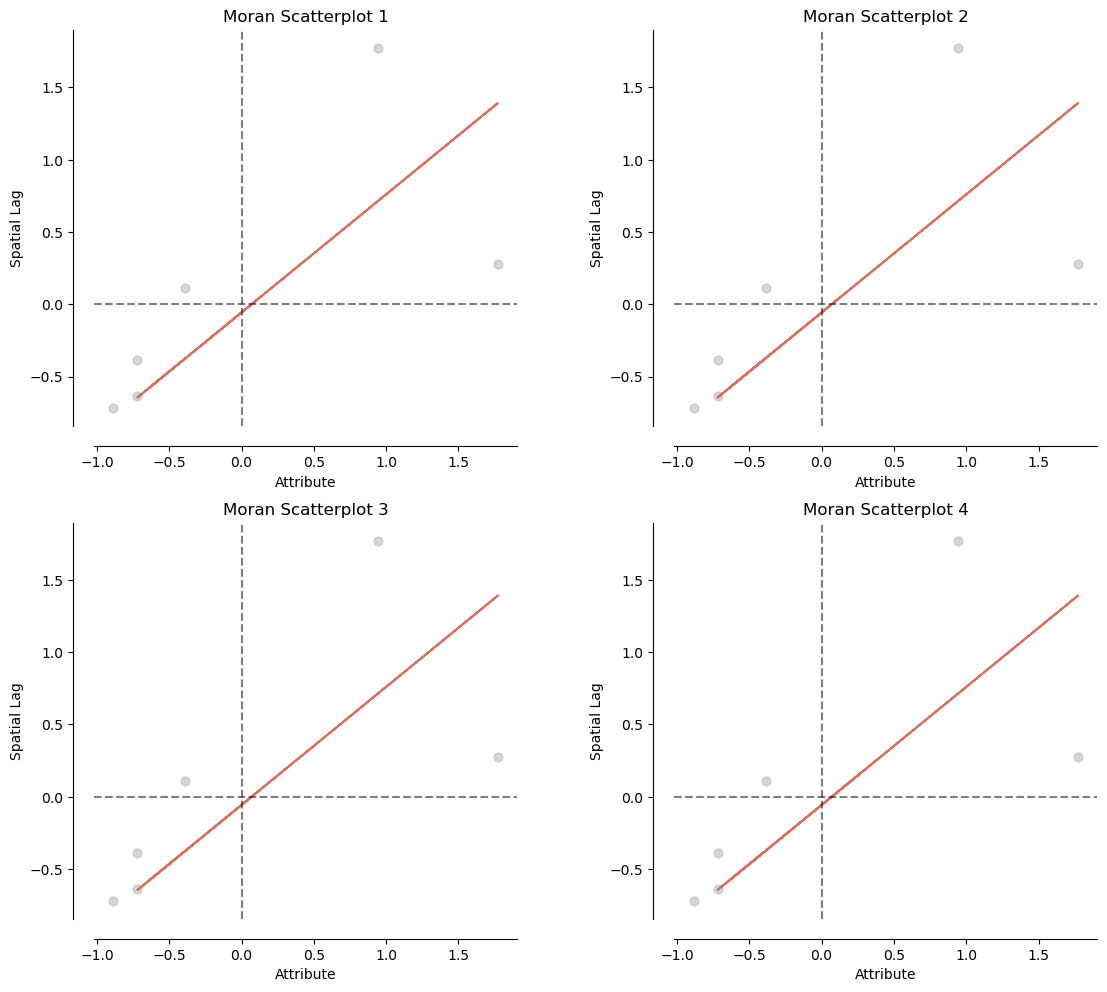

In [36]:
# Create a subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create and show the Moran Scatterplot for moran1
plot1 = moran_scatterplot(moran1, ax=axes[0, 0])
axes[0, 0].set_title('Moran Scatterplot 1')

# Create and show the Moran Scatterplot for moran2
plot2 = moran_scatterplot(moran2, ax=axes[0, 1])
axes[0, 1].set_title('Moran Scatterplot 2')

# Create and show the Moran Scatterplot for moran3
plot3 = moran_scatterplot(moran3, ax=axes[1, 0])
axes[1, 0].set_title('Moran Scatterplot 3')

# Create and show the Moran Scatterplot for moran4
plot4 = moran_scatterplot(moran4, ax=axes[1, 1])
axes[1, 1].set_title('Moran Scatterplot 4')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

### Observation:

**Moran Scatterplot 1**:

In the first Moran Scatterplot, the calculated Moran's I value is approximately 0.58. This scatterplot illustrates a positive spatial autocorrelation, where climate codes with similar values tend to cluster together. This suggests that, in the initial scenario, regions sharing similar grid codes exhibit a distinct pattern of spatial proximity, indicating a homogeneity in climate conditions.

**Moran Scatterplot 2**:

Similarly, in the second Moran Scatterplot, the Moran's I value is also approximately 0.58, revealing a positive spatial autocorrelation. Regions with akin grid codes continue to cluster together, maintaining a consistent pattern of climate homogeneity.

**Moran Scatterplot 3**:

The third scenario, as represented in Moran Scatterplot 3, also maintains a Moran's I value of approximately 0.58, indicating a positive spatial autocorrelation. Just like the previous scenarios, regions with climate codes of similar values exhibit clustering, underscoring the ongoing pattern of spatial similarity in climate conditions.

**Moran Scatterplot 4**:

The fourth scenario, as represented in Moran Scatterplot 4, also maintains a Moran's I value of approximately 0.58, indicating a positive spatial autocorrelation. Just like the previous scenarios, regions with climate codes of similar values exhibit clustering, underscoring the ongoing pattern of spatial similarity in climate conditions.


### Overall Findings:

The analysis of the four scenarios reveals consistent positive spatial autocorrelation in the first four scenarios, where regions with similar climate codes cluster together. In summary, the findings highlight there is no change in the spatial autocorrelation pattern between the four scenarios.

### CONCLUSION

In conclusion, the spatial analysis conducted on the climate data has provided valuable insights into the distribution and patterns of climate regions within the geographic area. Here are the key findings and conclusions from the spatial analysis:

Climate Distribution: The analysis revealed the spatial distribution of climate regions based on the 'Climate Code' attribute. This allowed us to visually assess the diversity of climate types across the study area.

Climate Change Comparison: By comparing climate data for different time periods, there was a shifts in climate regions. These changes are indicative of the impact of climate change on the study area.

Moran's I Analysis: Moran's I statistic was used to assess spatial autocorrelation. The Moran Scatterplots provided evidence of positive or negative spatial autocorrelation in the 'GRIDCODE' attribute, indicating clustering or dispersion of similar climate regions.

Comparison of Climate Scenarios: Comparing climate data for different scenarios (e.g., A1F1, A2, B1, B2) highlighted variations in climate regions and how they are affected by different socio-economic and environmental factors.

## GLOBAL ROAD DATASET

In [37]:
#Read and load the json file
with open ("C:/Users/adere/Downloads/Global Roads Open Access Data Set.json.geojson") as file:
    road = json.load(file)

In [38]:
#create GeoDataFrame from the road data
Global_road = gpd.GeoDataFrame.from_features(road['features'])

In [39]:
Global_road.head(2)

,geometry,OBJECTID,ONME,FCLASS,SRFTPE,ISSEASONAL,CURNTPRAC,GDWTHRPRAC,SUM_LENGTH_KM
0,"LINESTRING (-66.82451 17.98029, -66.82455 17.9...",1,None,0,0.0,0.0,NaN,NaN,16686.65607
1,"LINESTRING (-66.62012 17.98131, -66.62126 17.9...",2,None,0,0.0,0.0,NaN,NaN,16686.65607


In [40]:
# Count the number of seasonal and non-seasonal roads
seasonal_count = Global_road ['ISSEASONAL'].sum()
non_seasonal_count = len(Global_road) - seasonal_count

# Calculate the percentage of seasonal and non-seasonal roads
total_count = len(Global_road)
percentage_seasonal = (seasonal_count / total_count) * 100
percentage_non_seasonal = (non_seasonal_count / total_count) * 100

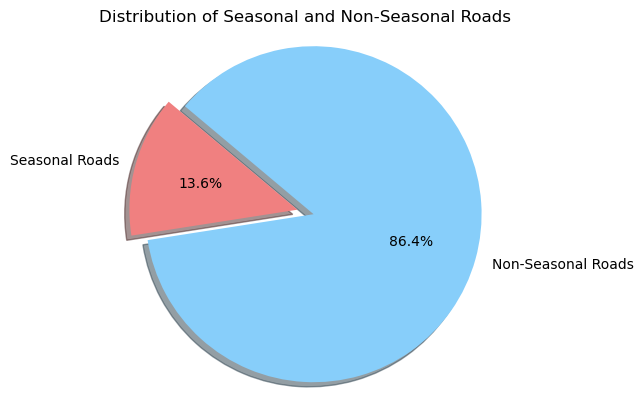

In [41]:
# Create a pie chart to visualize the distribution
labels = ['Seasonal Roads', 'Non-Seasonal Roads']
sizes = [seasonal_count, non_seasonal_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # To explode the 'Seasonal Roads' slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set a title
plt.title('Distribution of Seasonal and Non-Seasonal Roads')

# Show the pie chart
plt.show()

###  Observation:

Seasonal Roads (13.6%):

Approximately 13.6% of the road segments fall into the 'Seasonal' category. These are road segments that are subject to seasonal variations, which can include changes in road conditions due to weather-related factors.
Seasonal roads may experience challenges during specific times of the year, such as winter weather, heavy rainfall, or other climatic conditions. This could lead to issues like reduced road accessibility, the need for maintenance, or adjustments in transportation planning.
Non-Seasonal Roads (86.4%):

The majority, accounting for about 86.4% of the road segments, belong to the 'Non-Seasonal' category. These roads are not affected by significant seasonal variations and are generally accessible and operational throughout the year.
Non-seasonal roads are more reliable for transportation and require fewer adaptations or maintenance efforts in response to weather changes.
The significance of this analysis lies in understanding the proportion of road segments that are influenced by seasonal factors. For transportation planning, infrastructure maintenance, and urban development, knowing the ratio of seasonal to non-seasonal roads is crucial. It helps in allocating resources effectively, preparing for weather-related challenges, and ensuring the reliability of the transportation network year-round

In [42]:
Global_road['SUM_LENGTH_KM']

0          16686.656070
1          16686.656070
2          16686.656070
3          16686.656070
4          16686.656070
               ...     
1101295      150.974974
1101296      127.996653
1101297      127.996653
1101298      127.996653
1101299      127.996653
Name: SUM_LENGTH_KM, Length: 1101300, dtype: float64

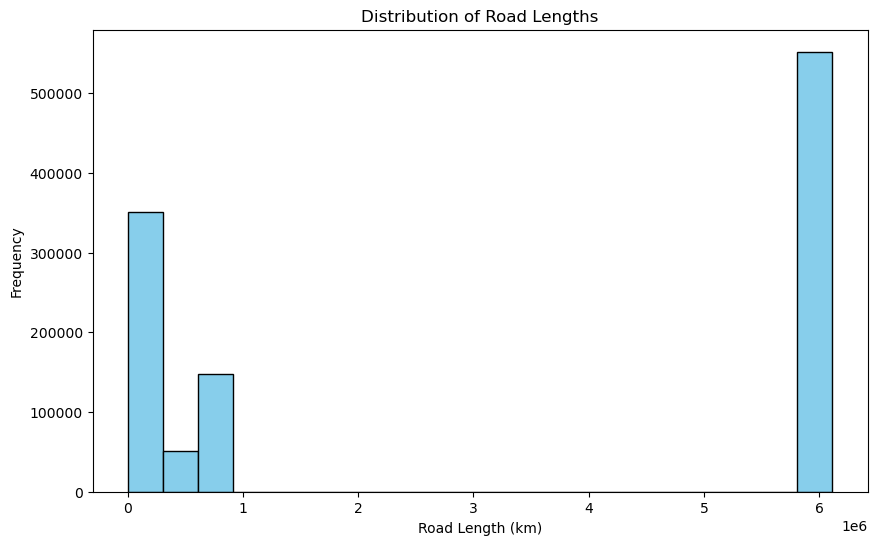

In [43]:
# Create a histogram to visualize the distribution of road lengths
plt.figure(figsize=(10, 6))
plt.hist(Global_road['SUM_LENGTH_KM'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Road Length (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Road Lengths')

# Show the plot
plt.show()

### Observation:

Based on the panalysis, the distribution of road lengths appears to be positively skewed to the right.
The histogram shows that there are some road segments with exceptionally long lengths, leading to a rightward extension of the distribution.
The mode of the distribution, representing the most common road length category, is located at the lower end of the range.
Few Extremely Long Road Segments: The presence of outliers on the right side of the histogram suggests that there are relatively few road segments with exceptionally long lengths.

In [44]:
Global_road['FCLASS'].value_counts()

FCLASS
0    582993
5    186610
6    153883
3     98708
4     41773
2     32703
1      4630
Name: count, dtype: int64

In [45]:
# Create a dictionary to map the numbers to specific features
feature_mapping = {
    0: 'Unspecified',
    1: 'Highway',
    2: 'Primary',
    3: 'Secondary',
    4: 'Tertiary',
    5: 'Local/Urban',
    6: 'Trail'
}

#map the values in FCLASS 
Global_road['FCLASS'] = Global_road['FCLASS'].map(feature_mapping)

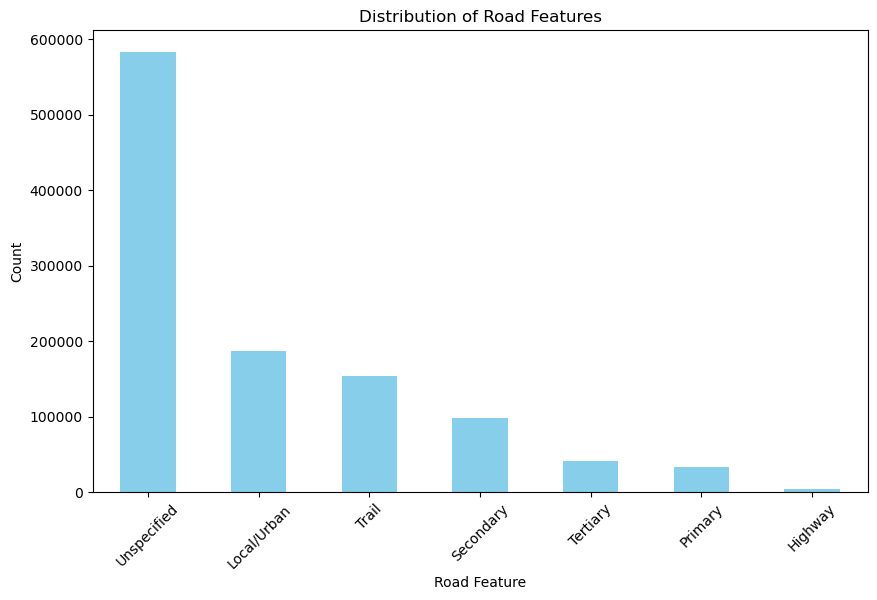

In [46]:
# Count the occurrences of each feature
feature_counts = Global_road['FCLASS'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
feature_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Road Feature')
plt.ylabel('Count')
plt.title('Distribution of Road Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility 

# Show the chart
plt.show()

### Observation:

Based on the comprehensive analysis of road features, it becomes evident that a significant portion of the road segments falls under the 'Unspecified' category, with a total count of 582,993. 

In contrast, the analysis reveals that there are fewer road segments categorized as 'Highway' with a count of 4,630. Highways play a pivotal role in long-distance transportation, acting as vital connectors between cities and regions. Typically characterized by multiple lanes and high-speed limits, highways are designed to facilitate efficient, rapid transit over extended distances. While they represent a smaller portion of the dataset, their significance in enabling long-distance travel and interconnecting urban centers cannot be understated.

## PROTECTED AREAS

In [47]:
#read the file
file_path = r"C:/Users/adere/Downloads/WDPA_WDOECM_wdpa_gdb_polygons/WDPA_WDOECM_wdpa_gdb_polygons.shp"

In [48]:
## Read geospatial data from the specified file path using GeoPandas
protected_area = gpd.read_file(file_path)

In [49]:
protected_area.head(2)

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,SUPP_INFO,CONS_OBJ,geometry
0,10715.0,10715,1,Kronotskiy,Kronotskiy,UNESCO-MAB Biosphere Reserve,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,...,Not Reported,Not Reported,State Verified,840,RU-KAM,RUS,RUS,Not Applicable,Not Applicable,"MULTIPOLYGON (((160.49655 55.17709, 160.49907 ..."
1,209777.0,209777_E,1,Sarali Land between Rivers / Great Volzhsko-Ka...,Great Volzhsko-Kamsky,UNESCO-MAB Biosphere Reserve,UNESCO-MAB Biosphere Reserve,International,Not Applicable,Not Applicable,...,Not Reported,Not Reported,State Verified,840,RU-TA,RUS,RUS,Not Applicable,Not Applicable,"POLYGON ((49.30487 55.36806, 49.30433 55.37184..."


In [50]:
#Print column names
protected_area.columns

Index(['WDPAID', 'WDPA_PID', 'PA_DEF', 'NAME', 'ORIG_NAME', 'DESIG',
       'DESIG_ENG', 'DESIG_TYPE', 'IUCN_CAT', 'INT_CRIT', 'MARINE',
       'REP_M_AREA', 'GIS_M_AREA', 'REP_AREA', 'GIS_AREA', 'NO_TAKE',
       'NO_TK_AREA', 'STATUS', 'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE',
       'MANG_AUTH', 'MANG_PLAN', 'VERIF', 'METADATAID', 'SUB_LOC',
       'PARENT_ISO', 'ISO3', 'SUPP_INFO', 'CONS_OBJ', 'geometry'],
      dtype='object')

In [51]:
# Count the occurrences of each count_desig_type
count_desig_type =protected_area['DESIG_TYPE'].value_counts()

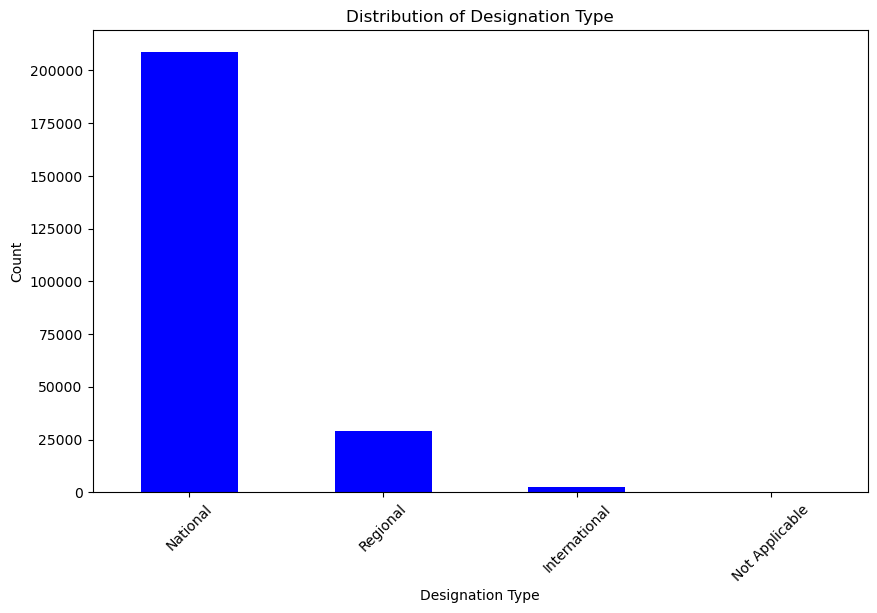

In [52]:
# Create a bar chart
plt.figure(figsize=(10, 6))
count_desig_type.plot(kind='bar', color='blue')
plt.xlabel('Designation Type')
plt.ylabel('Count')
plt.title('Distribution of Designation Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility 

# Show the chart
plt.show()

### Observation/findings:

The analysis of the current data reveals a significant number of protected areas that has been officially designated at both the national and sub-national levels. This trend signifies a growing recognition of the need to preserve and conserve our natural environment, as well as a commitment to safeguarding critical ecosystems and the diverse species that inhabit them.

At the national level, governments are taking proactive measures to identify and protect areas of ecological importance, which often involves designating them as official protected areas. These areas are set aside for the explicit purpose of conservation and are subject to specific regulations and management practices to ensure the long-term sustainability of their unique ecosystems. The expansion of such nationally designated protected areas is a positive development, indicating a heightened awareness of the ecological challenges we face and the commitment to address them.

In conclusion, the growing number of designated or proposed protected areas at both the national and sub-national levels signifies a promising step forward in the global effort to protect our natural heritage. It reflects a deeper understanding of the importance of conservation and underscores the commitment to safeguarding our planet's vital ecosystems for future generations. level.

In [53]:
status = protected_area['STATUS'].value_counts()

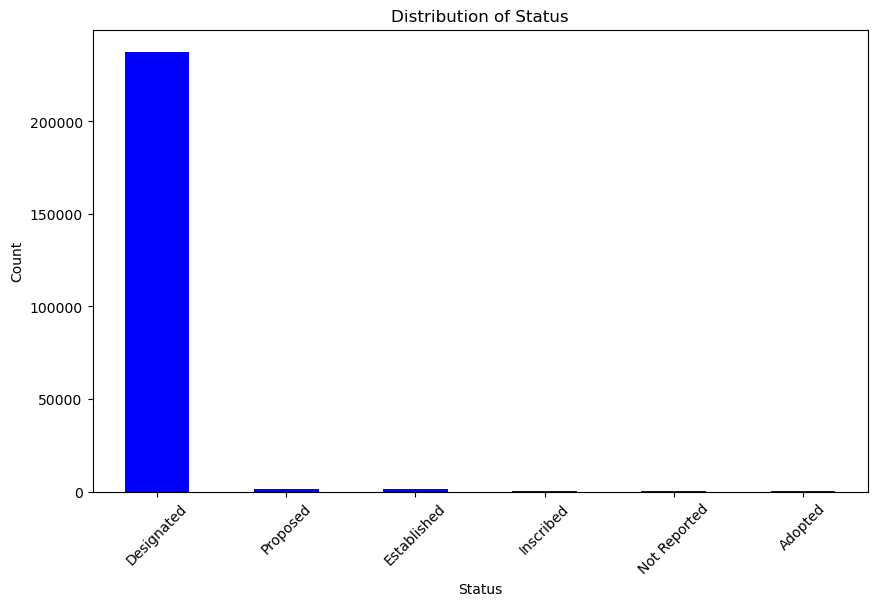

In [54]:
# Create a bar chart
plt.figure(figsize=(10, 6))
status.plot(kind='bar', color='blue')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility 

# Show the chart
plt.show()

### Observation/findings:

The increasing number of designated protected areas signifies a growing commitment to conservation efforts, which are officially recognized and formalized through legal mechanisms. These designated protected areas are established with the intention of making a steadfast and enduring commitment to the preservation of our natural environment.

In essence, a designated protected area is a region or location that has been set aside for the explicit purpose of safeguarding its unique ecological, cultural, or historical attributes. This designation is not merely symbolic but involves a legally binding commitment to ensure the long-term preservation and sustainability of these areas. It entails a series of measures and regulations that are put in place to safeguard the integrity of the ecosystem and the well-being of the species and communities that inhabit it.

In summary, the growing number of designated protected areas reflects a conscientious effort to protect and preserve our planet's natural and cultural heritage. These areas are not just tokens of conservation; they are legal commitments that ensure the enduring care and sustainability of our planet's most valuable and fragile assets.

In [55]:
# Count the occurrences of each gov type
gov_type =protected_area['GOV_TYPE'].value_counts()

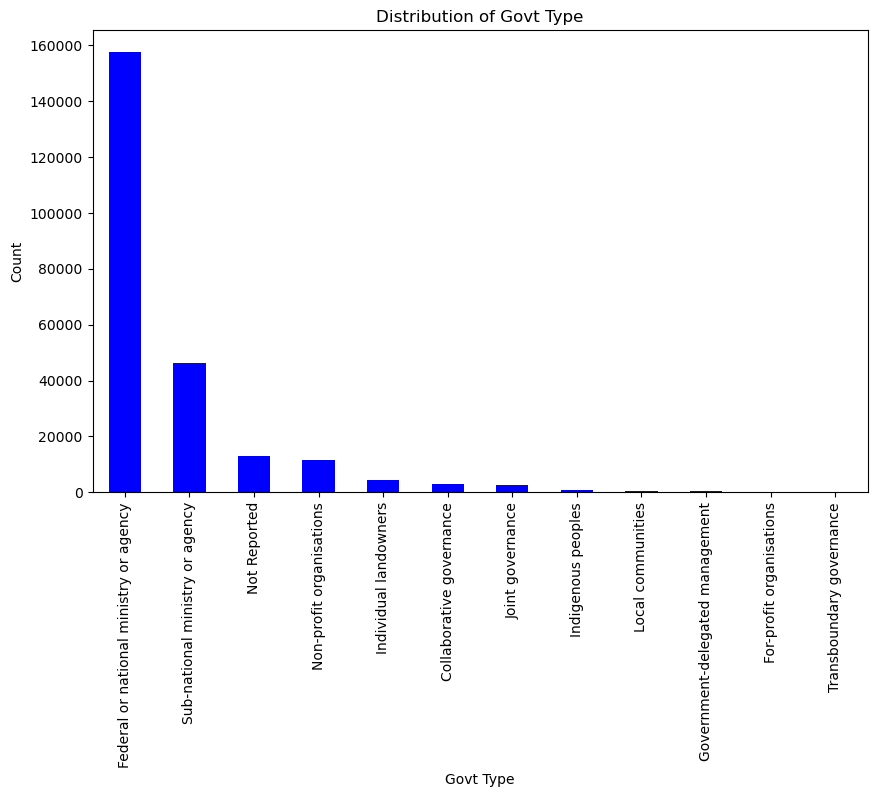

In [56]:
# Create a bar chart
plt.figure(figsize=(10, 6))
gov_type.plot(kind='bar', color='blue')
plt.xlabel('Govt Type')
plt.ylabel('Count')
plt.title('Distribution of Govt Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility 

# Show the chart
plt.show()

### Observation/findings:

In many countries, the management and oversight of protected areas are typically organized in a hierarchical manner, with various levels of government agencies playing distinct roles in preserving these important natural spaces. At the Federal or national level, a designated National Agency often holds the primary responsibility for managing and conserving protected areas. These National Agencies are entrusted with the task of formulating and implementing policies, regulations, and conservation strategies to ensure the sustainable use and protection of these areas.

Following the National Agency, sub-national government entities, such as regional, provincial, or municipal agencies, play vital roles in supporting the preservation and management of protected areas. These sub-national agencies, which can vary in their titles and jurisdictions depending on the country's administrative structure, work in close collaboration with the National Agency to enforce conservation measures, monitor ecosystem health, and address regional-specific challenges.

Regional agencies are typically responsible for managing protected areas that fall within their jurisdiction, which may encompass multiple provinces or states.Provincial or state-level agencies are responsible for implementing conservation efforts and regulations within their respective territories. At the municipal or local level, agencies may oversee protected areas that fall within city or town boundaries. Their responsibilities include day-to-day management, visitor services, and working closely with the community to foster a sense of ownership and responsibility for the protected areas.

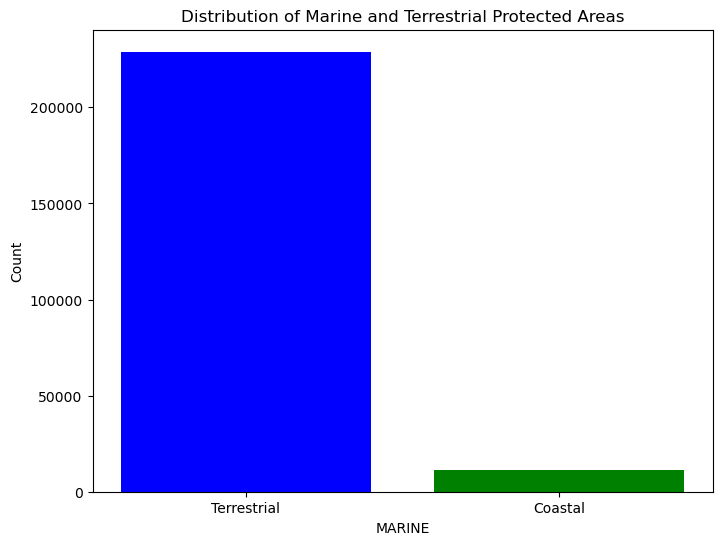

In [57]:
# Count the number of records for each unique value in the 'MARINE' column
marine_counts = protected_area['MARINE'].value_counts()

# Visualize the distribution of marine and terrestrial protected areas
plt.figure(figsize=(8, 6))
plt.bar(marine_counts.index, marine_counts.values, color=['blue', 'green'])
plt.xlabel('MARINE')
plt.ylabel('Count')
plt.title('Distribution of Marine and Terrestrial Protected Areas')
plt.xticks([0, 1], ['Terrestrial', 'Coastal'])

# Show the bar chart
plt.show()

### Observation/findings

The analysis shows that majority of protected areas are entirely situated within terrestrial and/or freshwater ecosystems. This finding underscores the significant emphasis placed on safeguarding and preserving the terrestrial and freshwater environments through designated conservation areas. These protected zones play a crucial role in preserving the biodiversity, ecological integrity, and natural resources associated with these specific ecosystems.

### Conclusion

In conclusion, the increasing number of designated protected areas signifies a collective dedication to the preservation of our planet's natural and cultural heritage. These areas are not symbolic gestures but legally binding commitments to ensure the enduring care and sustainability of most valuable and fragile assets. The hierarchy of managing the protected at various government levels further contributes to the effective preservation of these areas, and the emphasis on terrestrial and freshwater ecosystems underscores a strategic approach to conservation. This progress marks a promising step in our ongoing effort to protect and sustain our planet's invaluable natural resources for future generations.

### References

[Observed and projected climate shifts 1901–2100 depicted by world maps of the Koppen-Geiger climate classification ]('http://koeppen-geiger.vu-wien.ac.at/pdf/Paper_2010.pdf')

[World Map of the Köppen-Geiger climate classification updated]('https://w2.weather.gov/media/jetstream/global/Koppen-Geiger.pdf')

[Global Road Dataset]('https://sedac.ciesin.columbia.edu/downloads/docs/groads/groads-v1-documentation.pdf')